# Assignment 2 - Weather

***


Plotting Temperature over Time from data contained in a CSV file.

In [ ]:
# import required libraries
import pandas as pd   
import matplotlib.pyplot as plt

# import modules for formatting dates for axes ticks
from matplotlib.dates import DateFormatter
from matplotlib.dates import MinuteLocator

We need to have a look at the data inside, so that we know what variables we have to plot.

In [2]:
# Load the csv dataset using pandas
df = pd.read_csv("weatherreadings1.csv")

In [3]:
# Print first 5 rows of the dataframe
df.head(5)

,siteId,reportStartDateTime,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,...,isDcnn,longitude,latitude,height,id,localReportEndDateTime,externalSiteId,createdDateTime,version,externalId
0,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:15:00+00:00,2024-10-02T16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,...,False,-8.8545,53.5244,45,20241002oarq1xwy5re69kyhyyguw31uhh,2024-10-02T16:15:00+00:00,1000013318,2024-10-02T16:15:28.5671119+00:00,1,12577570561
1,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:45:00+00:00,2024-10-02T16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,...,False,-8.8545,53.5244,45,20241002zafpyewy5we69kyhyytrtenn4a,2024-10-02T16:45:00+00:00,1000013318,2024-10-02T16:45:40.4251616+00:00,1,12577595550
2,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:00:00+00:00,2024-10-02T17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,...,False,-8.8545,53.5244,45,202410027k7rmycy5he69kyhyytrtenn4a,2024-10-02T17:00:00+00:00,1000013318,2024-10-02T17:01:12.3376405+00:00,1,12577608947
3,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:15:00+00:00,2024-10-02T17:15:00+00:00,1,True,True,1,WeatherLink,38,74.9,...,False,-8.8545,53.5244,45,20241002h49q6thyhre69kyhyytrtenn4a,2024-10-02T17:15:00+00:00,1000013318,2024-10-02T17:15:22.2638326+00:00,1,12577622149
4,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:30:00+00:00,2024-10-02T17:30:00+00:00,1,True,True,1,WeatherLink,0,77.0,...,False,-8.8545,53.5244,45,20241002977ft1hyhce69kyhyytrtenn4a,2024-10-02T17:30:00+00:00,1000013318,2024-10-02T17:30:29.3915476+00:00,1,12577636922


In [4]:
# Check datatypes 
df.dtypes

siteId                             object
reportStartDateTime                object
reportEndDateTime                  object
collectionName                      int64
isPublic                             bool
isLatestVersion                      bool
observationType                     int64
softwareType                       object
windDirection                       int64
relativeHumidity                  float64
windSpeed_MilePerHour             float64
windSpeed_MetrePerSecond          float64
dryBulbTemperature_Fahrenheit     float64
dryBulbTemperature_Celsius        float64
wetBulbTemperature_Fahrenheit     float64
wetBulbTemperature_Celsius        float64
rainfallAmount_Inch                 int64
rainfallAmount_Millimetre           int64
rainfallRate_InchPerHour            int64
rainfallRate_MillimetrePerHour      int64
airPressure_InchOfMercury         float64
airPressure_Hectopascal           float64
dewPointTemperature_Fahrenheit    float64
dewPointTemperature_Celsius       

The columns of interest are already numeric type, no need to convert.

In [5]:
# Check how many missing entries in each column
df.isna().sum()

siteId                            0
reportStartDateTime               0
reportEndDateTime                 0
collectionName                    0
isPublic                          0
isLatestVersion                   0
observationType                   0
softwareType                      0
windDirection                     0
relativeHumidity                  0
windSpeed_MilePerHour             0
windSpeed_MetrePerSecond          0
dryBulbTemperature_Fahrenheit     0
dryBulbTemperature_Celsius        0
wetBulbTemperature_Fahrenheit     0
wetBulbTemperature_Celsius        0
rainfallAmount_Inch               0
rainfallAmount_Millimetre         0
rainfallRate_InchPerHour          0
rainfallRate_MillimetrePerHour    0
airPressure_InchOfMercury         0
airPressure_Hectopascal           0
dewPointTemperature_Fahrenheit    0
dewPointTemperature_Celsius       0
isOfficial                        0
isDcnn                            0
longitude                         0
latitude                    

In [6]:
# View the first row in the dataframe
df.iloc[0]

siteId                            f2d42aea-f516-ec11-b76a-0003ff599499
reportStartDateTime                          2024-10-02T16:15:00+00:00
reportEndDateTime                            2024-10-02T16:15:00+00:00
collectionName                                                       1
isPublic                                                          True
isLatestVersion                                                   True
observationType                                                      1
softwareType                                               WeatherLink
windDirection                                                      322
relativeHumidity                                                  70.4
windSpeed_MilePerHour                                             3.06
windSpeed_MetrePerSecond                                       1.36794
dryBulbTemperature_Fahrenheit                                     60.7
dryBulbTemperature_Celsius                                   15.944444
wetBul

In [7]:
# View statistics overview
df.describe()

,collectionName,observationType,windDirection,relativeHumidity,windSpeed_MilePerHour,windSpeed_MetrePerSecond,dryBulbTemperature_Fahrenheit,dryBulbTemperature_Celsius,wetBulbTemperature_Fahrenheit,wetBulbTemperature_Celsius,...,airPressure_InchOfMercury,airPressure_Hectopascal,dewPointTemperature_Fahrenheit,dewPointTemperature_Celsius,longitude,latitude,height,externalSiteId,version,externalId
count,89.0,89.0,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,...,89.000000,89.000000,89.000000,89.000000,89.0000,8.900000e+01,89.0,8.900000e+01,89.0,8.900000e+01
mean,1.0,1.0,188.292135,85.135955,2.866067,1.281245,53.030337,11.683521,50.375281,10.208489,...,29.962416,1014.643950,48.606742,9.225968,-8.8545,5.352440e+01,45.0,1.000013e+09,1.0,1.257823e+10
std,0.0,0.0,144.536579,5.626101,2.637010,1.178847,3.373102,1.873946,2.165236,1.202909,...,0.036299,1.229232,1.627240,0.904022,0.0000,7.145685e-15,0.0,0.000000e+00,0.0,3.879131e+05
min,1.0,1.0,0.000000,70.400000,0.000000,0.000000,48.500000,9.166667,47.200000,8.444444,...,29.867000,1011.412803,46.000000,7.777778,-8.8545,5.352440e+01,45.0,1.000013e+09,1.0,1.257757e+10
25%,1.0,1.0,40.000000,79.900000,1.000000,0.447039,50.500000,10.277778,48.800000,9.333333,...,29.947000,1014.121914,47.400000,8.555556,-8.8545,5.352440e+01,45.0,1.000013e+09,1.0,1.257790e+10
50%,1.0,1.0,275.000000,87.200000,2.000000,0.894079,51.500000,10.833333,49.600000,9.777778,...,29.963000,1014.663736,48.300000,9.055556,-8.8545,5.352440e+01,45.0,1.000013e+09,1.0,1.257824e+10
75%,1.0,1.0,333.000000,89.400000,3.750000,1.676397,55.800000,13.222222,52.000000,11.111111,...,29.991000,1015.611925,49.600000,9.777778,-8.8545,5.352440e+01,45.0,1.000013e+09,1.0,1.257857e+10
max,1.0,1.0,359.000000,92.400000,14.250000,6.370309,60.700000,15.944444,54.700000,12.611111,...,30.015000,1016.424658,51.800000,11.000000,-8.8545,5.352440e+01,45.0,1.000013e+09,1.0,1.257889e+10


Now to convert the 'date' column to [pandas datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html). 

Pandas converts dates to DateTime objects, making working with dates much easier. The user guide can be found [here](https://pandas.pydata.org/docs/user_guide/timeseries.html).



In [8]:
# Convert reportStartDateTime column to pandas datetime format
df["reportStartDateTime"] = pd.to_datetime(df["reportStartDateTime"])

## Plotting

Matplotlib has a module [matplotlib.dates](https://matplotlib.org/stable/api/dates_api.html) for manipulating date formats easily, so that we can set nice tick labels on the time axis.

Theres a good example of its use found [here](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html), where date tick labels are handled nicely using major/minor locators and formatters.

You can use [DateFormatter](https://matplotlib.org/stable/api/dates_api.html#matplotlib.dates.DateFormatter) to format dates with `strftime` format, basically a string representing date and time.

[MinuteLocater](https://matplotlib.org/stable/gallery/ticks/date_formatters_locators.html) lets us put minor ticks at x minute intervals.

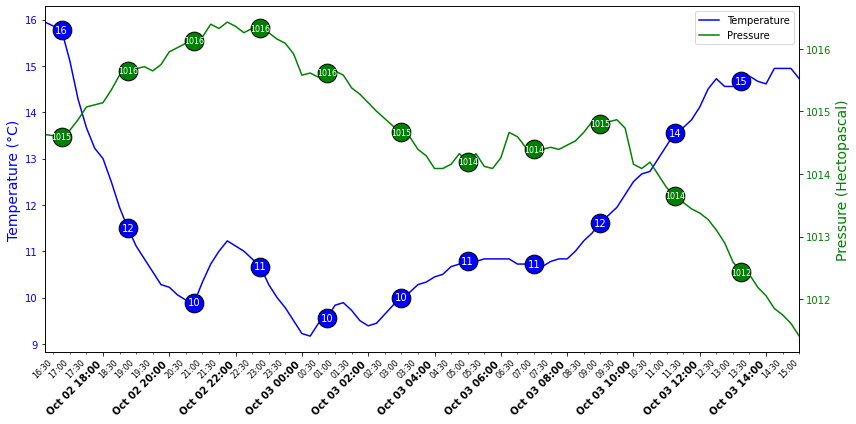

In [11]:
# Set up the figure and axes, set figure size
fig, ax1 = plt.subplots(figsize=(12, 6))

# Define x and y values
x = df["reportStartDateTime"]
y_temp = df["dryBulbTemperature_Celsius"]
y_pressure = df["airPressure_Hectopascal"]

# Create the plot, with legend
ax1.plot(x, y_temp, label="Temperature", color="blue")

# Set axis labels
ax1.set_ylabel("Temperature (°C)", fontsize=14, color="blue")#, fontweight="bold")
ax1.tick_params(axis="y", labelcolor="blue")  # Match tick label color to line

# Set the major ticks to format the date labels
ax1.xaxis.set_major_formatter(DateFormatter("%b %d %H:%M"))

# Set minor ticks at 30-minute intervals
ax1.xaxis.set_minor_locator(MinuteLocator(interval=30))

# Display minor tick labels
ax1.xaxis.set_minor_formatter(DateFormatter("%H:%M"))

# Create a secondary y-axis for windspeed
ax2 = ax1.twinx()

# Create a secondary y-axis for windspeed
ax2.plot(x, y_pressure, label="Pressure", color="green")

# Set axis labels
ax2.set_ylabel("Pressure (Hectopascal)", fontsize=14, color="green")#, fontweight="bold")
ax2.tick_params(axis="y", labelcolor="green")  # Match tick label color to line

# Remove padding around the plot by setting margins to zero for the x-axis
ax2.margins(x=0)

# Set properties for major labels
for label in ax1.get_xticklabels(which="major"):
    label.set_rotation(45)
    label.set_horizontalalignment("right")
    label.set_verticalalignment("top")
    label.set_fontweight("bold")  # Set the major labels to bold
    label.set_fontsize(10)        # Adjust the font size for major labels

# Set properties for minor labels
for label in ax1.get_xticklabels(which="minor"):
    label.set_rotation(45)
    label.set_horizontalalignment("right")
    label.set_verticalalignment("top")
    label.set_fontsize(8)        # Adjust the font size for minor labels

# Create loop to annotate (ax1)
for i in range(1, len(x), len(x) // 10):  # annotate every 10th point
    # Draw a circle at the annotation position
    ax1.scatter(x[i], y_temp[i], color="blue", edgecolor="black", s=350, zorder=5)  # s is size
    
    # Add text inside the circle
    ax1.annotate(
        f"{round(y_temp[i])}",  # display rounded value
        (x[i], y_temp[i]),  # set annotation position
        color="white",
        fontsize=10,
        ha="center", va="center",  # Center the text inside the circle
        zorder=6  # Ensure text is above the circle
    )

# Annotate the pressure line (ax2)
for i in range(1, len(x), len(x) // 10):
    # Draw a circle at the annotation position
    ax2.scatter(x[i], y_pressure[i], color="green", edgecolor="black", s=350, zorder=5)  # s is for size

    # Add text inside the circle
    ax2.annotate(
        f"{round(y_pressure[i])}",  # display rounded value
        (x[i], y_pressure[i]),  # set annotation position
        color="white",
        fontsize=8,
        ha="center", va="center",  # Center the text inside the circle
        zorder=6  # Ensure text is above the circle
    )

# With secondary axis, legend is trickier
# first get line and label information from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# Combine them into a single legend
lines = lines1 + lines2
labels = labels1 + labels2

# Add the combined legend to the plot
ax1.legend(lines, labels, loc="upper right")

# Adjust layout to prevent label overlap
fig.tight_layout()

The plot above was annotated using ax.annotate()

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html

***

### END